In [4]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import os
from glob import glob

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.layers import SimpleRNN

In [6]:
col_names = ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']

print(col_names)

['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd By

In [7]:
path = r'C:\Users\anush\cic-ids dataset 2018'
extension = 'csv'
os.chdir(path)
result = glob('*.{}'.format(extension))
print(result)

['02-14-2018.csv', '02-15-2018.csv', '02-16-2018.csv', '02-28-2018.csv', '03-01-2018.csv', '03-02-2018.csv']


In [8]:
dataset= pd.read_csv(
r'C:\Users\anush\cic-ids dataset 2018\02-15-2018.csv')

In [11]:
#dataset_2= pd.read_csv(r'C:\Users\anush\cic-ids dataset 2018\02-15-2018.csv')

In [12]:
#dataset_3= pd.read_csv(r'C:\Users\anush\cic-ids dataset 2018\02-16-2018.csv',low_memory=False)

In [13]:
dataset_1.head()

NameError: name 'dataset_1' is not defined

In [9]:
dataset_1.shape

(1048575, 80)

In [10]:
dataset_2.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [11]:
dataset_2.shape

(1048575, 80)

In [12]:
dataset_3.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,56300000,138.5929291,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,56300000,263.7508294,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9058214,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,56300000,82.02438662,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign


In [13]:
#dataset=pd.concat([dataset_1,dataset_2,dataset_3])
#dataset=dataset_3

In [14]:
dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [15]:
dataset.shape

(1048575, 80)

<AxesSubplot: ylabel='Label'>

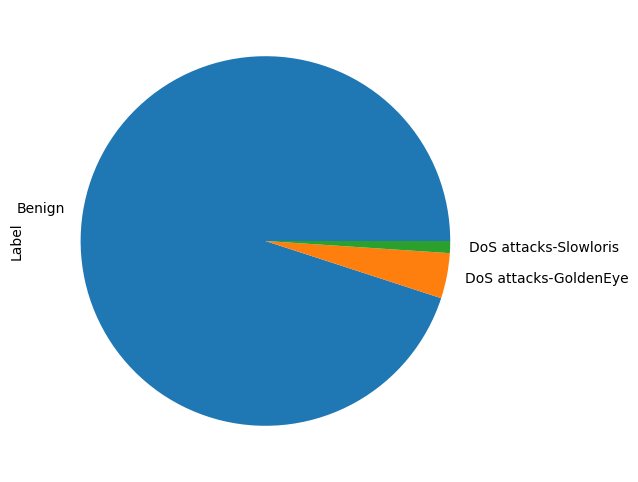

In [16]:
dataset['Label'].value_counts().plot(kind='pie',figsize=(6,6))

In [17]:
x =dataset.drop(['Label'], axis=1)
y = dataset['Label']

In [18]:
y.value_counts()

Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

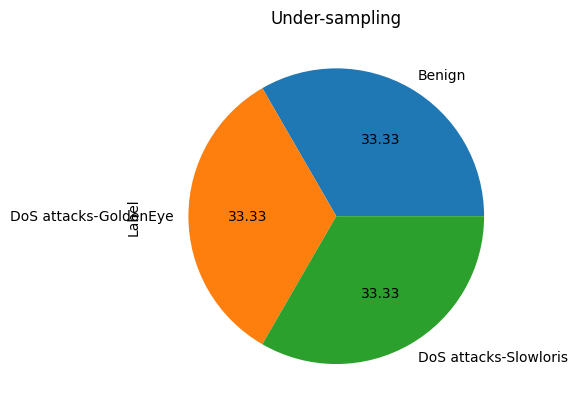

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy ="not minority")
X_res,y_res = rus.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Under-sampling")

In [20]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

<AxesSubplot: ylabel='Label'>

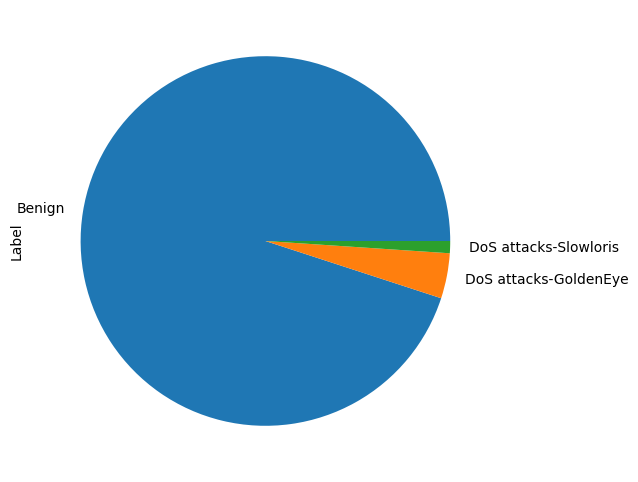

In [21]:
training_data['Label'].value_counts().plot(kind='pie',figsize=(6,6))

In [22]:
print('Dimensions of the Training set:',training_data.shape)
print('Dimensions of the testing set:',testing_data.shape)

Dimensions of the Training set: (838860, 80)
Dimensions of the testing set: (209715, 80)


In [23]:

training_data.head()


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
935473,3128,6,15/02/2018 09:54:33,1001779,2,0,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,Benign
373078,53,17,15/02/2018 12:03:12,554,1,1,38,70,38,38,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
410541,53,17,15/02/2018 11:53:54,37364,1,1,38,155,38,38,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
670297,53,17,15/02/2018 04:16:23,884,1,1,33,252,33,33,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1018262,53,17,15/02/2018 01:58:28,12754,1,1,44,121,44,44,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [24]:
testing_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
5,0,0,15/02/2018 08:33:45,112640945,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320472.5,2.213244e+02,56320629,56320316,Benign
15,22,6,15/02/2018 08:50:02,27180357,12,8,1184,2145,712,0,...,32,566916.5,491680.336337,914587,219246,13023255.0,7.197923e+06,18112955,7933555,Benign
16,50742,6,15/02/2018 08:50:29,628,3,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
20,0,0,15/02/2018 08:56:17,112640740,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320370.0,5.515433e+02,56320760,56319980,Benign


In [25]:
print('Label distribution in the Training set:')
print("****************************************")
print(training_data['Label'].value_counts())


Label distribution in the Training set:
****************************************
Benign                   796817
DoS attacks-GoldenEye     33162
DoS attacks-Slowloris      8881
Name: Label, dtype: int64


In [26]:
print('Label distribution in the Training set:')
print("****************************************")
print(testing_data['Label'].value_counts())

Label distribution in the Training set:
****************************************
Benign                   199260
DoS attacks-GoldenEye      8346
DoS attacks-Slowloris      2109
Name: Label, dtype: int64


In [27]:
print('Training set:')
for col_name in training_data.columns:
    if training_data[col_name].dtypes == 'object' :
        unique_cat = len(training_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in destination port:')
print(training_data['Dst Port'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'Timestamp' has 33802 categories
Feature 'Label' has 3 categories

Distribution of categories in destination port:
53      266308
80      191388
443     124747
3389     59988
445      45774
Name: Dst Port, dtype: int64


In [28]:
print('testing set:')
for col_name in training_data.columns:
    if training_data[col_name].dtypes == 'object' :
        unique_cat = len(testing_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in destination port:')
print(testing_data['Dst Port'].value_counts().sort_values(ascending=False).head())

testing set:
Feature 'Timestamp' has 31908 categories
Feature 'Label' has 3 categories

Distribution of categories in destination port:
53      66782
80      47655
443     31104
3389    14973
445     11394
Name: Dst Port, dtype: int64


label encoder

In [29]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=["Label"]

training_data_categorical_values = training_data[categorical_columns]
# for Test
testing_data_categorical_values = testing_data[categorical_columns]

In [30]:
unique_Label=sorted(training_data.Label.unique())
string1 = 'Label:'
unique_Label2=[string1 + x for x in unique_Label]
print(unique_Label2)


['Label:Benign', 'Label:DoS attacks-GoldenEye', 'Label:DoS attacks-Slowloris']


In [31]:
unique_Label_t=sorted(testing_data.Label.unique())
string1_t = 'Label:'
unique_Label2_t=[string1_t + x for x in unique_Label_t]
print(unique_Label2_t)

['Label:Benign', 'Label:DoS attacks-GoldenEye', 'Label:DoS attacks-Slowloris']


In [32]:
training_data_categorical_values_enc=training_data_categorical_values.apply(LabelEncoder().fit_transform)
print(training_data_categorical_values.head())
print('--------------------')
print(training_data_categorical_values_enc.head())


          Label
935473   Benign
373078   Benign
410541   Benign
670297   Benign
1018262  Benign
--------------------
         Label
935473       0
373078       0
410541       0
670297       0
1018262      0


In [33]:
testing_data_categorical_values_enc=testing_data_categorical_values.apply(LabelEncoder().fit_transform)
print(testing_data_categorical_values.head())
print('--------------------')
print(testing_data_categorical_values_enc.head())

     Label
0   Benign
5   Benign
15  Benign
16  Benign
20  Benign
--------------------
    Label
0       0
5       0
15      0
16      0
20      0


In [34]:
enc = OneHotEncoder(categories='auto')
training_data_categorical_values_encenc = enc.fit_transform(training_data_categorical_values_enc)
training_data_cat_data = pd.DataFrame(training_data_categorical_values_encenc.toarray(),columns=unique_Label2)

In [35]:
enc = OneHotEncoder(categories='auto')
testing_data_categorical_values_encenc = enc.fit_transform(testing_data_categorical_values_enc)
testing_data_cat_data = pd.DataFrame(testing_data_categorical_values_encenc.toarray(),columns=unique_Label2_t)

In [36]:
new_training_data=training_data.join(training_data_cat_data)
new_training_data.drop('Label', axis=1, inplace=True)

In [37]:
new_testing_data=testing_data.join(testing_data_cat_data)
new_testing_data.drop('Label', axis=1, inplace=True)

In [38]:
new_training_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label:Benign,Label:DoS attacks-GoldenEye,Label:DoS attacks-Slowloris
935473,3128,6,15/02/2018 09:54:33,1001779,2,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,NaN,NaN,NaN
373078,53,17,15/02/2018 12:03:12,554,1,1,38,70,38,38,...,0.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0
410541,53,17,15/02/2018 11:53:54,37364,1,1,38,155,38,38,...,0.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0
670297,53,17,15/02/2018 04:16:23,884,1,1,33,252,33,33,...,0.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0
1018262,53,17,15/02/2018 01:58:28,12754,1,1,44,121,44,44,...,0.0,0,0,0.0,0.0,0,0,NaN,NaN,NaN


In [39]:
new_testing_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label:Benign,Label:DoS attacks-GoldenEye,Label:DoS attacks-Slowloris
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,1.0,0.0,0.0
5,0,0,15/02/2018 08:33:45,112640945,3,0,0,0,0,0,...,0.000000,0,0,56320472.5,2.213244e+02,56320629,56320316,1.0,0.0,0.0
15,22,6,15/02/2018 08:50:02,27180357,12,8,1184,2145,712,0,...,491680.336337,914587,219246,13023255.0,7.197923e+06,18112955,7933555,0.0,1.0,0.0
16,50742,6,15/02/2018 08:50:29,628,3,0,64,0,64,0,...,0.000000,0,0,0.0,0.000000e+00,0,0,0.0,1.0,0.0
20,0,0,15/02/2018 08:56:17,112640740,3,0,0,0,0,0,...,0.000000,0,0,56320370.0,5.515433e+02,56320760,56319980,0.0,1.0,0.0


In [40]:
new_training_data.drop('Timestamp', axis=1, inplace=True)

In [41]:
new_testing_data.drop('Timestamp', axis=1, inplace=True)

In [42]:
new_training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label:Benign,Label:DoS attacks-GoldenEye,Label:DoS attacks-Slowloris
935473,3128,6,1001779,2,0,0,0,0,0,0.0,...,0.0,0,0,0.0,0.0,0,0,NaN,NaN,NaN
373078,53,17,554,1,1,38,70,38,38,38.0,...,0.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0
410541,53,17,37364,1,1,38,155,38,38,38.0,...,0.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0
670297,53,17,884,1,1,33,252,33,33,33.0,...,0.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0
1018262,53,17,12754,1,1,44,121,44,44,44.0,...,0.0,0,0,0.0,0.0,0,0,NaN,NaN,NaN


In [43]:
new_testing_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label:Benign,Label:DoS attacks-GoldenEye,Label:DoS attacks-Slowloris
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,1.0,0.0,0.0
5,0,0,112640945,3,0,0,0,0,0,0.000000,...,0.000000,0,0,56320472.5,2.213244e+02,56320629,56320316,1.0,0.0,0.0
15,22,6,27180357,12,8,1184,2145,712,0,98.666667,...,491680.336337,914587,219246,13023255.0,7.197923e+06,18112955,7933555,0.0,1.0,0.0
16,50742,6,628,3,0,64,0,64,0,21.333333,...,0.000000,0,0,0.0,0.000000e+00,0,0,0.0,1.0,0.0
20,0,0,112640740,3,0,0,0,0,0,0.000000,...,0.000000,0,0,56320370.0,5.515433e+02,56320760,56319980,0.0,1.0,0.0


In [44]:
training_data.drop('Timestamp',axis=1,inplace=True)

In [45]:
testing_data.drop('Timestamp',axis=1,inplace=True)

In [46]:
training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
935473,3128,6,1001779,2,0,0,0,0,0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,Benign
373078,53,17,554,1,1,38,70,38,38,38.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
410541,53,17,37364,1,1,38,155,38,38,38.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
670297,53,17,884,1,1,33,252,33,33,33.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1018262,53,17,12754,1,1,44,121,44,44,44.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [47]:
testing_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
5,0,0,112640945,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320472.5,2.213244e+02,56320629,56320316,Benign
15,22,6,27180357,12,8,1184,2145,712,0,98.666667,...,32,566916.5,491680.336337,914587,219246,13023255.0,7.197923e+06,18112955,7933555,Benign
16,50742,6,628,3,0,64,0,64,0,21.333333,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
20,0,0,112640740,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320370.0,5.515433e+02,56320760,56319980,Benign


In [48]:
label_training_data=training_data['Label']


# change the label column
new_label_training_data=label_training_data.replace({ 'Benign':1, 'DoS attacks-GoldenEye':2, 'DoS attacks-Hulk':3, 'DoS attacks-SlowHTTPTest':4, 'DoS attacks-Slowloris':5, 'FTP-BruteForce':6, 'SSH-Bruteforce': 7})




#put the new label column back
training_data['Label'] = new_label_training_data


In [49]:
label_testing_data=testing_data['Label']


# change the label column
new_label_testing_data=label_testing_data.replace({ 'Benign':1, 'DoS attacks-GoldenEye':2, 'DoS attacks-Hulk':3, 'DoS attacks-SlowHTTPTest':4, 'DoS attacks-Slowloris':5, 'FTP-BruteForce':6, 'SSH-Bruteforce': 7})




#put the new label column back
testing_data['Label'] = new_label_testing_data

In [50]:

training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
935473,3128,6,1001779,2,0,0,0,0,0,0.0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,1
373078,53,17,554,1,1,38,70,38,38,38.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
410541,53,17,37364,1,1,38,155,38,38,38.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
670297,53,17,884,1,1,33,252,33,33,33.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
1018262,53,17,12754,1,1,44,121,44,44,44.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1


In [51]:
testing_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,1
5,0,0,112640945,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320472.5,2.213244e+02,56320629,56320316,1
15,22,6,27180357,12,8,1184,2145,712,0,98.666667,...,32,566916.5,491680.336337,914587,219246,13023255.0,7.197923e+06,18112955,7933555,1
16,50742,6,628,3,0,64,0,64,0,21.333333,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,1
20,0,0,112640740,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320370.0,5.515433e+02,56320760,56319980,1


In [52]:
x=training_data.drop(["Label"],1) 

y=new_label_training_data  # label


C:\Users\anush\AppData\Local\Temp\ipykernel_21536\2271327407.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=training_data.drop(["Label"],1)


In [53]:
x_test=testing_data.drop(["Label"],1) 

y_test=new_label_testing_data # label


C:\Users\anush\AppData\Local\Temp\ipykernel_21536\510198314.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=testing_data.drop(["Label"],1)


In [54]:
x.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
935473,3128,6,1001779,2,0,0,0,0,0,0.0,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
373078,53,17,554,1,1,38,70,38,38,38.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
410541,53,17,37364,1,1,38,155,38,38,38.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
670297,53,17,884,1,1,33,252,33,33,33.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
1018262,53,17,12754,1,1,44,121,44,44,44.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0


In [55]:
x_test.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081
5,0,0,112640945,3,0,0,0,0,0,0.000000,...,0,0,0.0,0.000000,0,0,56320472.5,2.213244e+02,56320629,56320316
15,22,6,27180357,12,8,1184,2145,712,0,98.666667,...,6,32,566916.5,491680.336337,914587,219246,13023255.0,7.197923e+06,18112955,7933555
16,50742,6,628,3,0,64,0,64,0,21.333333,...,1,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0
20,0,0,112640740,3,0,0,0,0,0,0.000000,...,0,0,0.0,0.000000,0,0,56320370.0,5.515433e+02,56320760,56319980


In [56]:
y.head()

935473     1
373078     1
410541     1
670297     1
1018262    1
Name: Label, dtype: int64

In [57]:
y_test.head()

0     1
5     1
15    1
16    1
20    1
Name: Label, dtype: int64

In [58]:
x.replace([np.inf, -np.inf ], np.nan, inplace=True)

In [59]:
x_test.replace([np.inf, -np.inf ], np.nan, inplace=True)

In [60]:
x1 = x.fillna(0)

In [61]:
x1_test = x_test.fillna(0)

In [62]:
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(x1)
X_train_scaled=scale.transform(x1)
print(X_train_scaled)

[[-0.24327258 -0.66330828 -0.39896043 ... -0.11354377 -0.31045705
  -0.29360927]
 [-0.41860076  1.41147869 -0.42897221 ... -0.11354377 -0.31045705
  -0.29360927]
 [-0.41860076  1.41147869 -0.42786883 ... -0.11354377 -0.31045705
  -0.29360927]
 ...
 [-0.41860076  1.41147869 -0.42892898 ... -0.11354377 -0.31045705
  -0.29360927]
 [ 3.13186626 -0.66330828 -0.42898764 ... -0.11354377 -0.31045705
  -0.29360927]
 [-0.41860076  1.41147869 -0.42896283 ... -0.11354377 -0.31045705
  -0.29360927]]


In [63]:
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(x1_test)
X_test_scaled=scale.transform(x1_test)
print(X_test_scaled)

[[-0.42099337 -1.79335443  2.95073455 ... -0.1112076   3.48253799
   3.73024902]
 [-0.42099337 -1.79335443  2.95072816 ... -0.11141638  3.48250781
   3.73026581]
 [-0.41973904 -0.66374717  0.38671416 ...  3.00012428  0.90901952
   0.27224596]
 ...
 [-0.39573575 -0.66374717 -0.42875132 ... -0.11151206 -0.3109835
  -0.29473538]
 [-0.39573575 -0.66374717  1.18142729 ... -0.11151206  3.29311037
   3.52933105]
 [ 2.43608179 -0.66374717 -0.42875834 ... -0.11151206 -0.3109835
  -0.29473538]]


In [64]:
from tensorflow import keras
import numpy as np
import datetime
import time

sample = X_train_scaled.shape[0]
features = X_train_scaled.shape[1]
#Train: convert 2D to 3D for input RNN
x_train = np.reshape(X_train_scaled,(sample,features,1)) #shape  = (125973, 18, 1)
#Test: convert 2D to 3D for input RNN

x_test = np.reshape(X_test_scaled,(X_test_scaled.shape[0],X_test_scaled.shape[1],1))

In [65]:
y.head()

935473     1
373078     1
410541     1
670297     1
1018262    1
Name: Label, dtype: int64

In [66]:
y_test.head()

0     1
5     1
15    1
16    1
20    1
Name: Label, dtype: int64

In [67]:
mcp = ModelCheckpoint('RNN_multicalss1.h5')

In [68]:
import tensorflow as tf 
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [71]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (multilabel_confusion_matrix, precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from datetime import datetime
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

from sklearn.utils import resample


In [ ]:
model = Sequential()

model.add(LSTM(128, input_shape=(x_train.shape[1:]),activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=1e-3 ,decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(x_train,y,epochs =10 ,validation_data=(x_test,y_test))

Epoch 1/10
  310/26215 [..............................] - ETA: 52:07 - loss: 11.1777 - accuracy: 0.9457

In [70]:
loss, accuracy  = model.evaluate(x_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [373]:
y_pred = np.argmax(model.predict(x_test),axis =1)
print (y_pred )

6554/6554 [==============================] - 445s 68ms/step
[1 1 1 ... 1 1 1]


In [375]:
model.save('C:/Anusha Chigurupati/cic-ids 2018/model.hdf5')

In [378]:
print("\n run time:",datetime.now())


 run time: 2022-11-29 20:47:10.191438


In [379]:
loss ,accuracy = model.evaluate(x_test,y_test)

6554/6554 [==============================] - 532s 81ms/step - loss: 0.1750 - accuracy: 0.9501


In [380]:
print("\n Loss: %.2f,Accuracy:%.2f%%"%(loss,accuracy*100))


 Loss: 0.17,Accuracy:95.01%


In [383]:
recall = recall_score(y_test, y_pred , average="micro")
print(recall)

0.9501466275659824


In [386]:
precision = precision_score(y_test, y_pred , average="micro")
print(precision)

0.9501466275659824


In [113]:

print(x_train.shape)
print(y.shape)


(2516580, 78, 1)
(2516580,)


In [114]:
print(x_test.shape)
print(y_test.shape)

(25269, 78, 1)
(25269,)


In [75]:
sample = X_train_scaled.shape[0]
features = X_train_scaled.shape[1]
#Train: convert 2D to 3D for input RNN

x_train = np.reshape(X_train_scaled, (sample, 1, features))
x_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
x_train.shape, x_test.shape

#****** check to remove sample value from reshape by executing all the above commands
#x_train = np.reshape(X_train_scaled[0],(sample,features,1)) #shape  = (125973, 18, 1)

#x_test = np.reshape(X_test_scaled,(X_test_scaled.shape[0],X_test_scaled.shape[1],1))

((2516580, 1, 78), (25269, 1, 78))

In [76]:

print(x_train.shape)
print(y.shape)

(2516580, 1, 78)
(2516580,)


In [77]:
print(x_test.shape)
print(y_test.shape)

(25269, 1, 78)
(25269,)


In [81]:
print(x_train.shape)
print(x_train[0].shape)

(2516580, 1, 78)
(1, 78)


In [98]:
model = Sequential()
model.add(SimpleRNN(196,input_dim=78, return_sequences=True))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(3,activation='sigmoid'))
model.add(SimpleRNN(196, return_sequences=False))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
#model.layers[3].get_config()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 196)         53900     
                                                                 
 dropout_6 (Dropout)         (None, None, 196)         0         
                                                                 
 dense_6 (Dense)             (None, None, 3)           591       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 196)               39200     
                                                                 
 dropout_7 (Dropout)         (None, 196)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 197       
                                                                 
Total params: 93,888
Trainable params: 93,888
Non-trai

In [101]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (multilabel_confusion_matrix, precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from datetime import datetime
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

from sklearn.utils import resample



In [102]:
opt = tf.keras.optimizers.Adam(lr=1e-3 ,decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(x_train,y,epochs =3 ,validation_data=(x_test,y_test))

C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\anush\AppData\Local\Temp\ipykernel_17876\4244324346.py", line 5, in <module>
      model.fit(x_train,y,epochs =3 ,validation_data=(x_test,y_test))
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 7 which is outside the valid range of [0, 1).  Label values: 1 4 1 1 1 1 7 1 1 1 1 1 3 4 1 1 6 1 3 7 1 3 1 1 1 1 3 6 3 1 7 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_4034]

In [100]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="D:/project -1/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis1.csv',separator=',', append=False)
#X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)

In [97]:
batch_size = 100
model.fit(x_train, y, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),callbacks=[checkpointer,csv_logger])
#model.save('C:\Users\anush\cic-ids dataset 2018 -1/model/model.hdf5')


Epoch 1/10


ValueError: in user code:

    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 3) vs (None, 1)).


In [160]:
model = Sequential()

model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]),activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=1e-3 ,decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(x_train,y,epochs =3 ,validation_data=(x_test,y_test))

Epoch 1/3
 6386/78644 [=>............................] - ETA: 2:49:49 - loss: 6052476.5000 - accuracy: 0.6689

KeyboardInterrupt: 

In [105]:
import tensorflow as tf
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [106]:
import tensorflow.keras.backend as K
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec+K.epsilon()))

In [107]:
from keras import optimizers 
#model = Sequential()
#model.add(SimpleRNN(80,input_shape=(features,x_train.shape[2]), activation='relu'))
#model.add(Dense(5, activation='softmax'))
#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mae', recall,precision,f1_score])
#model.summary()
model = Sequential()
model.add(SimpleRNN(196,input_dim=78, return_sequences=True))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(3,activation='sigmoid'))
model.add(SimpleRNN(196, return_sequences=False))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
#model.layers[3].get_config()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 196)         53900     
                                                                 
 dropout_8 (Dropout)         (None, None, 196)         0         
                                                                 
 dense_8 (Dense)             (None, None, 3)           591       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 196)               39200     
                                                                 
 dropout_9 (Dropout)         (None, 196)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 197       
                                                                 
Total params: 93,888
Trainable params: 93,888
Non-trai

In [108]:
mcp = ModelCheckpoint('RNN_multicalss1.h5')

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(60, activation='relu'))
	model.add(Dense(5, activation='softmax'))
    
	# Compile model
  
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator,x_test,y_test, cv=kfold)
print("Accuracy: %.2f%%" % (results.mean()*100))

C:\Users\anush\AppData\Local\Temp\ipykernel_17876\2688500558.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=5, verbose=0)


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\anush\AppData\Local\Temp\__autograph_generated_filehg7p1ppu.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\anush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7) and (None, 1, 5) are incompatible



In [162]:
print(x_train.shape)
print(y.shape)

(2516580, 78, 1)
(2516580,)


In [164]:
print(x_test.shape)
print(y_test.shape)

(25269, 78, 1)
(25269,)


In [165]:
import tensorflow as tf
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]